In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Data = pandas.read_excel("precipitation.xlsx")

In [2]:
year = Data['Year'].values
month = Data['Month'].values
day = Data['Day'].values
t_min = Data['T_min'].values
t_max = Data['T_max'].values
t_mean = Data['T_mean'].values
tot_prec = Data['Total precipitation'].values
numbers = Data['No'].values


x_train = np.zeros((19807,6))
x_train[:,0] = year[193:20000]
x_train[:,1] = month[193:20000]
x_train[:,2] = day[193:20000]
x_train[:,3] = t_min[193:20000]
x_train[:,4] = t_mean[193:20000]
x_train[:,5] = t_max[193:20000]


In [3]:
y_train = tot_prec[193:20000]

In [4]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
x_test = np.zeros((4683,6))
x_test[:,0] = year[20001:24684]
x_test[:,1] = month[20001:24684]
x_test[:,2] = day[20001:24684:]
x_test[:,3] = t_min[20001:24684]
x_test[:,4] = t_mean[20001:24684]
x_test[:,5] = t_max[20001:24684]

predicted = clf.predict(x_test)
expected = tot_prec[20001:24684]

RMS: 4.18061667139


C:\Users\user\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


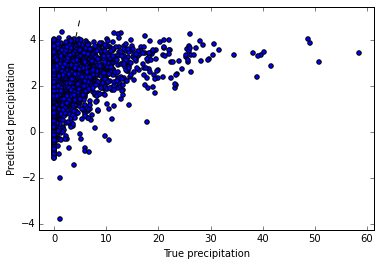

In [6]:
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
print "RMS:", np.sqrt(np.mean((predicted - expected) ** 2))

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

data = x_train
targets = y_train
clf = GradientBoostingRegressor()
clf.fit(data, targets)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

RMS: 4.16936809966


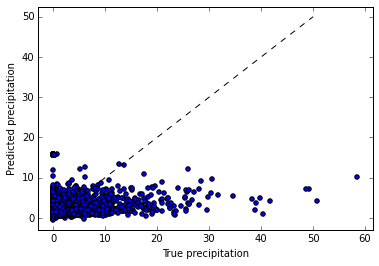

In [9]:
predicted = clf.predict(x_test)
expected = tot_prec[20001:24684]


plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True precipitation')
plt.ylabel('Predicted precipitation')
print "RMS:", np.sqrt(np.mean((predicted - expected) ** 2))